In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

In [351]:
#import train data
las1=lasio.read("well-log-data/31_2-21 S.las")
las2=lasio.read("well-log-data/25_6-3.las")
las3=lasio.read("well-log-data/25_11-5.las")
las4=lasio.read("well-log-data/16_8-1.las")

In [352]:
#convert to data frame
df1=las1.df()
df2=las2.df()
df3=las3.df()
df4=las4.df()


In [353]:
#display unique characters
print(df1["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df2["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df3["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df4["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())

[   nan 70000. 80000. 65000. 65030. 30000. 90000.]
[   nan 65000. 65030. 30000. 70000. 99000. 80000.]
[   nan 65000. 30000. 70032. 80000. 70000. 65030.]
[   nan 65000. 65030. 70000. 74000. 99000. 30000. 80000. 70032.]


In [354]:
#import test data
las5=lasio.read("well-log-data/15_9-13.las")
test_df=las5.df()

# Clean and Prepare Train Data

In [355]:
#drop columns that are not mutual
df1=df1.drop(["BS", "ROPA", "DTS", "PEF", "DRHO"], axis=1)
df2=df2.drop(["BS", "MUDWEIGHT", "RSHA", "RMIC","SP", "DTS"], axis=1)
df3=df3.drop(["BS", "DCAL", "MUDWEIGHT", "SP", "DRHO"], axis=1)
df4=df4.drop(["MUDWEIGHT","SP","DRHO","RSHA"], axis=1)


In [356]:
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   ROP                                18664 non-null  float64
 4   RDEP                               18567 non-null  float64
 5   RMED                               18524 non-null  float64
 6   DTC                                18199 non-null  float64
 7   NPHI                               7835 non-null   float64
 8   GR                                 18666 non-null  float64
 9   RHOB                               7800 non-null   float64
 10  DEPTH_MD                           18567 non-null  float64
 11  X_LOC                              18567 non-nul

In [357]:
#merge dataframe
merged_df=pd.concat([df1,df2,df3,df4])
merged_df.shape

(62042, 14)

In [358]:
#drop column with <50% data entry
merged_df=merged_df.drop(["NPHI", "RHOB"], axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  31609 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   31579 non-null  float64
 2   CALI                               38367 non-null  float64
 3   ROP                                61261 non-null  float64
 4   RDEP                               57198 non-null  float64
 5   RMED                               57114 non-null  float64
 6   DTC                                54875 non-null  float64
 7   GR                                 61379 non-null  float64
 8   DEPTH_MD                           57198 non-null  float64
 9   X_LOC                              57198 non-null  float64
 10  Y_LOC                              57198 non-null  float64
 11  Z_LOC                              57198 non-

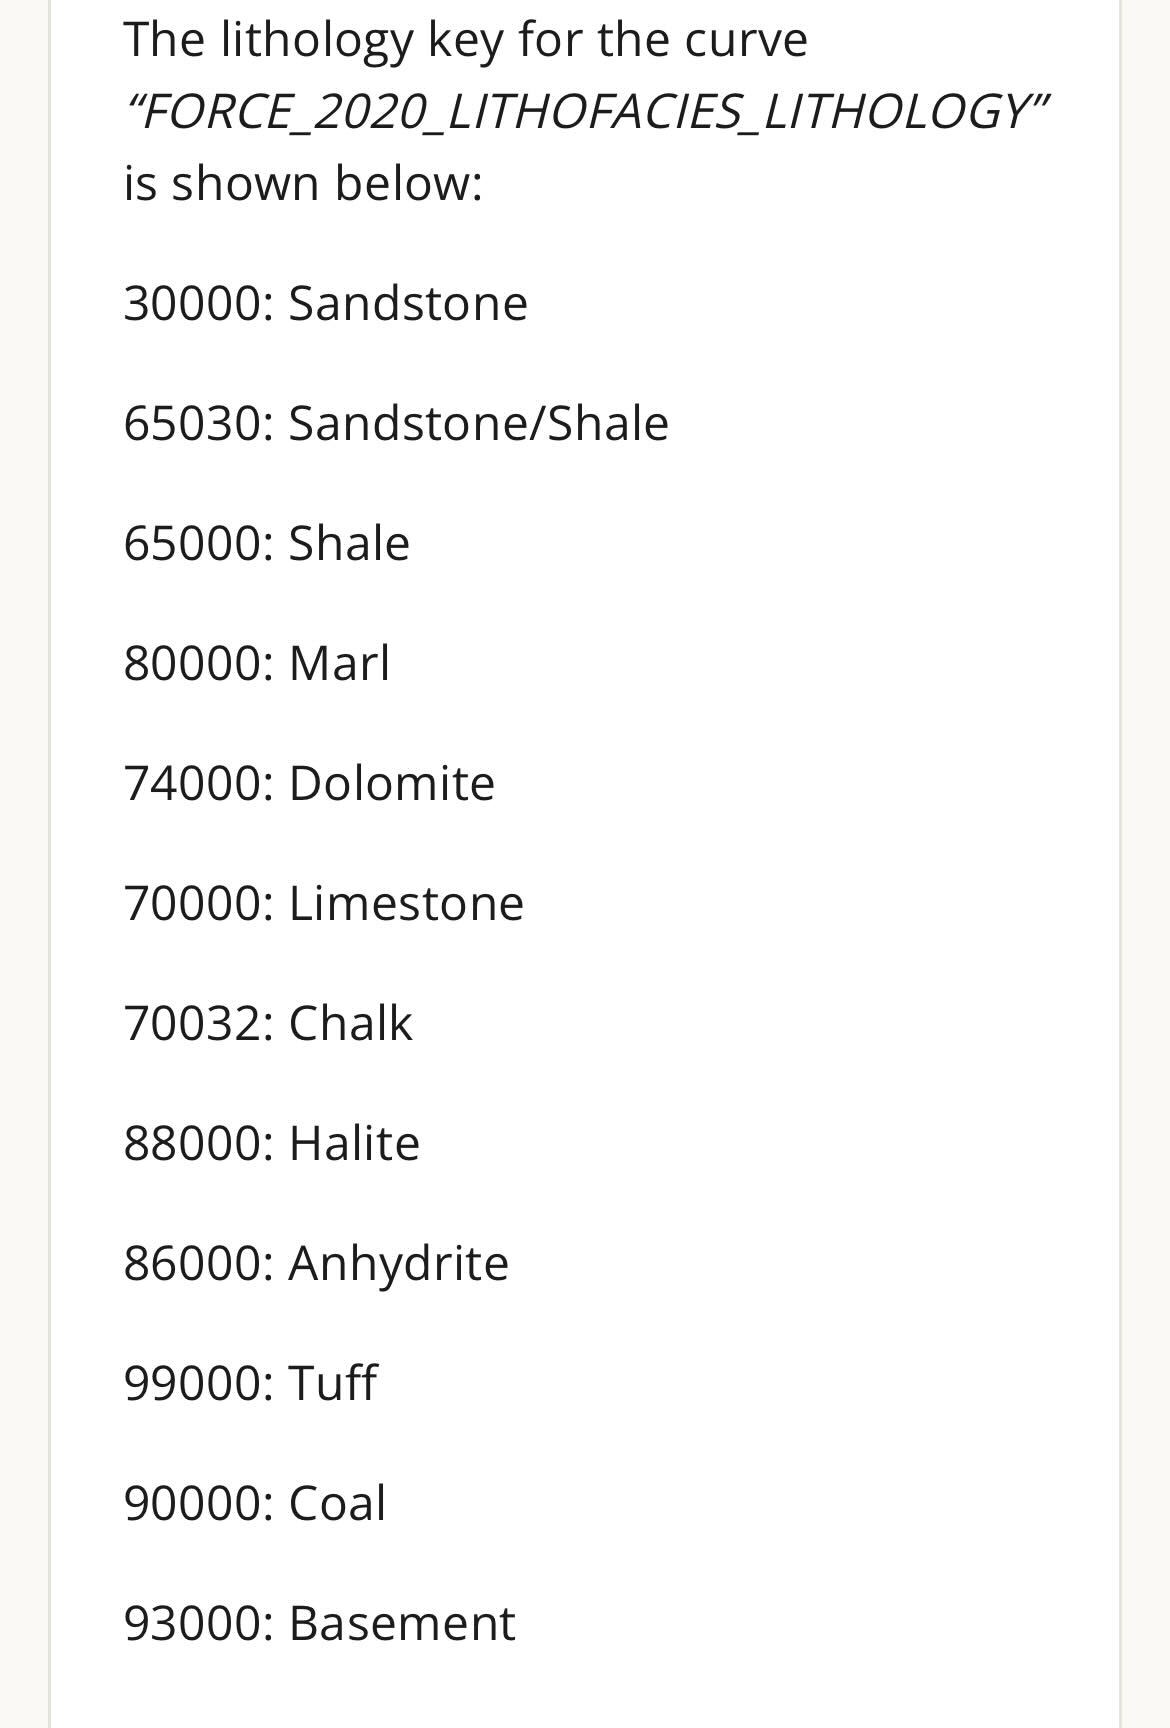

In [359]:
from IPython.display import display, Image

image_path = 'lithology facies.jpg'

display(Image(filename=image_path))

In [360]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 70000., 80000., 65000., 65030., 30000., 90000., 99000.,
       70032., 74000.])

In [361]:
lithologies=  {30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    86000: [7, "Anhydrite"],
    99000: [8, "Tuff"],
    90000: [9, "Coal"]}


In [362]:
lithologies[65000][1]

'Shale'

In [363]:
for key, value in lithologies.items():
        merged_df.loc[merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [364]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([nan,  3.,  6.,  1.,  2.,  0.,  9.,  8.,  4.,  5.])

# Prepare Test Data Set

In [365]:
#Eliminate columns that are mutual with the train data  set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 non-null  flo

In [366]:
test_df=test_df.drop(["MUDWEIGHT", "RSHA", "RHOB", "RXO", "SP", "DRHO", "PEF", "NPHI"], axis=1)


In [367]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 65000., 30000., 65030., 70000., 99000., 80000., 86000.,
       74000.])

In [368]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")

In [369]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  31609 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   31579 non-null  Int64  
 2   CALI                               38367 non-null  float64
 3   ROP                                61261 non-null  float64
 4   RDEP                               57198 non-null  float64
 5   RMED                               57114 non-null  float64
 6   DTC                                54875 non-null  float64
 7   GR                                 61379 non-null  float64
 8   DEPTH_MD                           57198 non-null  float64
 9   X_LOC                              57198 non-null  float64
 10  Y_LOC                              57198 non-null  float64
 11  Z_LOC                              57198 non-

In [370]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")


In [371]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  Int64  
 2   CALI                               18345 non-null  float64
 3   ROP                                20297 non-null  float64
 4   RDEP                               20956 non-null  float64
 5   RMED                               20957 non-null  float64
 6   DTC                                21282 non-null  float64
 7   GR                                 20900 non-null  float64
 8   DEPTH_MD                           20956 non-null  float64
 9   X_LOC                              20956 non-null  float64
 10  Y_LOC                              20956 non-null  float64
 11  Z_LOC                              20956 non-null  flo

In [372]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 3, 6, 1, 2, 0, 9, 8, 4, 5]
Length: 10, dtype: Int64

# Replace column's entries with corresponding discrete values for test data sets

In [373]:
for key, value in lithologies.items():
    test_df.loc[test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [374]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 1, 0, 2, 3, 8, 6, 7, 5]
Length: 9, dtype: Int64

In [375]:
#encoding for train data set
dummies = pd.get_dummies(merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"])

dummies = dummies.astype(int)
dummies

,0,1,2,3,4,5,6,8,9
DEPT,,,,,,,,,
372.008400,0,0,0,0,0,0,0,0,0
372.160400,0,0,0,0,0,0,0,0,0
372.312400,0,0,0,0,0,0,0,0,0
372.464400,0,0,0,0,0,0,0,0,0
372.616400,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2313.287197,0,0,0,0,0,0,0,0,0
2313.439197,0,0,0,0,0,0,0,0,0
2313.591197,0,0,0,0,0,0,0,0,0


In [376]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       62042 non-null  int32
 1   1       62042 non-null  int32
 2   2       62042 non-null  int32
 3   3       62042 non-null  int32
 4   4       62042 non-null  int32
 5   5       62042 non-null  int32
 6   6       62042 non-null  int32
 7   8       62042 non-null  int32
 8   9       62042 non-null  int32
dtypes: int32(9)
memory usage: 2.6 MB


In [377]:
new_merged_df = pd.concat([merged_df, dummies], axis=1)
new_merged_df

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,ROP,RDEP,RMED,DTC,GR,DEPTH_MD,X_LOC,...,Z_LOC,0,1,2,3,4,5,6,8,9
DEPT,,,,,,,,,,,,,,,,,,,,,
372.008400,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
372.160400,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
372.312400,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
372.464400,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
372.616400,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313.287197,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
2313.439197,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
2313.591197,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0


In [378]:
new_merged_df = new_merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY", 8], axis=1)
new_merged_df

,FORCE_2020_LITHOFACIES_CONFIDENCE,CALI,ROP,RDEP,RMED,DTC,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,0,1,2,3,4,5,6,9
DEPT,,,,,,,,,,,,,,,,,,,
372.008400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
372.160400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
372.312400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
372.464400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
372.616400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313.287197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
2313.439197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
2313.591197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [379]:
X_train = new_merged_df.drop([0, 1, 2, 3, 4, 5, 6, 9], axis=1)
y_train = new_merged_df[[0, 1, 2, 3, 4, 5, 6, 9]]

In [380]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  31609 non-null  float64
 1   CALI                               38367 non-null  float64
 2   ROP                                61261 non-null  float64
 3   RDEP                               57198 non-null  float64
 4   RMED                               57114 non-null  float64
 5   DTC                                54875 non-null  float64
 6   GR                                 61379 non-null  float64
 7   DEPTH_MD                           57198 non-null  float64
 8   X_LOC                              57198 non-null  float64
 9   Y_LOC                              57198 non-null  float64
 10  Z_LOC                              57198 non-null  float64
dtypes: float64(11)
memory usage: 5.7 MB


In [381]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       62042 non-null  int32
 1   1       62042 non-null  int32
 2   2       62042 non-null  int32
 3   3       62042 non-null  int32
 4   4       62042 non-null  int32
 5   5       62042 non-null  int32
 6   6       62042 non-null  int32
 7   9       62042 non-null  int32
dtypes: int32(8)
memory usage: 2.4 MB


In [382]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [383]:
#encoding for test data set
dummies = pd.get_dummies(test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"])
dummies= dummies.astype(int)
dummies

,0,1,2,3,5,6,7,8
DEPT,,,,,,,,
25.000,0,0,0,0,0,0,0,0
25.152,0,0,0,0,0,0,0,0
25.304,0,0,0,0,0,0,0,0
25.456,0,0,0,0,0,0,0,0
25.608,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3283.272,0,0,0,0,0,0,0,0
3283.424,0,0,0,0,0,0,0,0
3283.576,0,0,0,0,0,0,0,0


In [384]:
new_test_df = pd.concat([test_df, dummies], axis=1)
new_test_df = new_test_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY", 7], axis=1)

In [385]:
x_test = new_test_df.drop([0, 1, 2, 3, 5, 6, 8], axis=1)
y_test = new_test_df[[0, 1, 2, 3, 5, 6, 8]]

In [386]:
model.score(x_test, y_test)

ValueError: inconsistent shapes

In [387]:

y_train.shape

(62042, 8)

In [388]:
y_test.shape

(21441, 7)

In [389]:
y_test.head()

,0,1,2,3,5,6,8
DEPT,,,,,,,
25.000,0,0,0,0,0,0,0
25.152,0,0,0,0,0,0,0
25.304,0,0,0,0,0,0,0
25.456,0,0,0,0,0,0,0
25.608,0,0,0,0,0,0,0


In [390]:
y_train.head()

,0,1,2,3,4,5,6,9
DEPT,,,,,,,,
372.0084,0,0,0,0,0,0,0,0
372.1604,0,0,0,0,0,0,0,0
372.3124,0,0,0,0,0,0,0,0
372.4644,0,0,0,0,0,0,0,0
372.6164,0,0,0,0,0,0,0,0


In [391]:
#Since y_train and y_test have different shapes, let's add a new column to y_test
new_cols = [4]
for col in new_cols:
    y_test[col] = 0  # Fill new columns with zeros

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\892050039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[col] = 0  # Fill new columns with zeros


In [392]:
y_test.shape

(21441, 8)

In [393]:
model.score(x_test, y_test)

0.7118138146541673